In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import seaborn as sns

from scipy.stats import pearsonr

sns.set_style("darkgrid")
np.random.seed(930525)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 200)

warnings.simplefilter('once')

%matplotlib inline
%load_ext watermark
%watermark --iversions

pandas  1.0.4
numpy   1.18.4
seaborn 0.10.1



In [2]:
data_folder = "/mnt/btrfs/data/italy"

In [3]:
metadata_file = "/mnt/btrfs/data/italy/metadata.csv"

In [4]:
df_metadata_file = pd.read_csv(metadata_file, sep=",")

In [5]:
df_metadata_file.columns

Index(['sample_id', 'Sample_Number', 'Sample_Code', 'Shotgun', 'nCoVN1',
       'nCoVN2', 'RNase P', 'ConcN1', 'ConcN2', 'Sex', 'Age', 'Age_average',
       'Blood_sampling_date', 'Swab date', 'Severe_Case', 'REUMA', 'PNEUMO',
       'ONCO', 'HEMATO', 'DIABETES', 'METABOLIC', 'CARDIO', 'HYPERTENSION',
       'NEPHRO', 'TB', 'HIV', 'IMMUNOSUPPRESSION', 'HEPATOPATHY', 'HCQ', 'LPV',
       'HCQ_LPV', 'RDV', 'TCZ', 'BCT', 'Steroide', 'SYMPTOMS_ONSET',
       'SYMPTOMS_TO_SWAB_DAYS', 'Swab_day_quartile', 'swab_days_avg',
       'swab_out', 'OUTCOME', 'Hospitalization_Days', 'CRP', 'LDH', 'Ferritin',
       'CPK', 'WBC', 'Neutrophil_Count', 'AST', 'ALT', 'Albumin', 'D.Dimer',
       'Lowest_SpO2', 'Hospital_bin_01', 'Hospital_bin_02'],
      dtype='object')

In [6]:
df_metadata_file["RDV"].value_counts()

No     68
Yes    32
Name: RDV, dtype: int64

In [7]:
taxatable = "/mnt/btrfs/data/italy/shogun.capitalist.98.txt"

In [8]:
df_taxa_raw = pd.read_csv(taxatable, sep="\t", index_col=0)

In [9]:
columns = df_taxa_raw.columns

In [10]:
sample_ids = ["_".join(_.split(".")[:2]) if not _.startswith("pos") else "_".join(_.split(".")[:3]) for _ in columns]

In [11]:
df_taxa = df_taxa_raw.copy().T

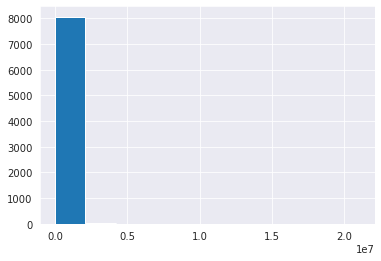

In [12]:
df_taxa_raw.T.sum(axis=0).hist()

In [13]:
df_taxa.shape[0]

35

In [14]:
mask_low_prevalence = ((df_taxa > 0).sum(axis=0) / df_taxa.shape[0]) >= .05

In [15]:
df_taxa = df_taxa.loc[:, mask_low_prevalence]

In [16]:
df_taxa.shape

(35, 6400)

In [17]:
# drop low relative abundance

df_ra_taxa = df_taxa.apply(lambda x: x / x.sum(), axis=1)

In [18]:
mask_low_ra = (df_ra_taxa.mean(axis=0) > .001)

In [19]:
df_taxa = df_taxa.loc[:, mask_low_ra]

In [20]:
from skbio.stats.composition import clr

/home/bhillmann/.conda/envs/type_1/lib/python3.8/site-packages/skbio/sequence/_sequence.py:28: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  collections.Sequence, SkbioObject):
/home/bhillmann/.conda/envs/type_1/lib/python3.8/site-packages/skbio/io/format/gff3.py:217: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Iterable
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [21]:
df_taxa_clr = df_taxa.copy()

In [22]:
df_taxa_clr = pd.DataFrame(clr(df_taxa + 1))

In [23]:
df_taxa_clr.columns = df_taxa.columns
df_taxa_clr.index = df_taxa.index

In [24]:
df_taxa_clr

#OTU ID,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__Prevotella_bivia,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__Bacteroides_stercoris,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Phocaeicola;s__Phocaeicola_vulgatus,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__Prevotella_salivae,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Tissierellales;f__Peptoniphilaceae;g__Peptoniphilus_A;s__Peptoniphilus_A_harei_A,k__Bacteria;p__Campylobacterota;c__Campylobacteria;o__Campylobacterales;f__Campylobacteraceae;g__Campylobacter_B;s__Campylobacter_B_hominis,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__Prevotella_timonensis_A,k__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Veillonellales;f__Dialisteraceae;g__Dialister;s__Dialister_sp900541485,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__Prevotella_timonensis,k__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Mycobacteriales;f__Mycobacteriaceae;g__Mycobacterium;s__Mycobacterium_sp001665295,...,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas;s__Pseudomonas_aeruginosa,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Klebsiella_B;s__Klebsiella_B_aerogenes,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Yersinia;s__Yersinia_enterocolitica,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae;g__Alistipes;s__Alistipes_sp900544265,k__Bacteria;p__Firmicutes_A;c__Clostridia_A;o__Christensenellales;f__CAG-138;g__PeH17;s__PeH17_sp000435055,k__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Akkermansiaceae;g__Akkermansia;s__Akkermansia_muciniphila,k__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Actinomycetales;f__Micrococcaceae;g__Rothia;s__Rothia_mucilaginosa,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus_B;s__Enterococcus_B_faecium,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactiplantibacillus;s__Lactiplantibacillus_plantarum,k__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Akkermansiaceae;g__Akkermansia;s__Akkermansia_sp004167605
WACH.38.S1.001.fa,8.821635,3.469388,3.934537,2.051169,4.330697,3.122185,5.813595,5.114778,6.436848,4.782436,...,-6.028759,-6.434224,-6.028759,-7.127371,-7.127371,-7.127371,-7.127371,-7.127371,-7.127371,-7.127371
DIGMA.71.S21.001.fa,3.076464,2.420895,6.575040,-2.999444,-3.279746,3.715334,1.771712,-0.527585,0.357454,-1.198467,...,1.128228,-7.499253,-7.499253,2.071625,-0.165577,-4.098056,-5.302029,-5.707494,-6.806106,-7.499253
DIAL.15.S23.001.fa,2.862035,1.343359,5.478281,-2.977032,-2.114808,-2.918621,2.984768,0.876788,3.722524,0.140985,...,-1.393490,-6.481087,-5.787940,-3.897089,4.485982,3.989850,-6.075622,-7.174234,-5.228324,-1.629056
DOEC.81.S30.001.fa,2.293977,3.461697,4.698356,-2.151943,0.599063,-2.136230,2.655910,-0.457947,2.982337,1.949765,...,-0.449666,-4.605666,-3.368055,-3.414939,2.555568,-0.417608,-5.107758,-8.243253,-7.550105,-1.133373
PAMA.46.S18.001.fa,2.566084,-1.323903,2.458828,-0.392345,3.462412,-1.116264,3.545306,3.606319,3.993714,5.456587,...,-3.115663,-5.680612,-5.680612,-3.601171,-1.919412,-3.483388,-3.601171,5.757105,-1.729368,-1.553478
DETH.41.S27.001.fa,4.264193,-1.216034,3.757023,-0.150129,1.890527,3.996006,4.596411,3.411678,5.112491,-2.282975,...,-5.831154,-7.217448,-7.217448,-5.020224,-1.736810,-2.526101,-3.106575,-5.608011,-7.217448,-7.217448
CAAU.07.S2.001.fa,2.823243,0.485294,6.517057,-0.915878,0.748753,-0.073333,2.499423,3.023997,3.104355,-2.287295,...,-7.755355,-7.755355,-7.755355,-5.675913,-4.664312,-5.558130,-7.755355,-7.755355,-6.145917,-7.755355
F

In [25]:
from skbio.stats.composition import ancom

In [26]:
mask_controls = [not _.startswith("pos") for _ in df_taxa.index]

In [31]:
df_taxa.index = sample_ids

df_taxa_nc = df_taxa.copy()

df_taxa_nc["sample_id"] = sample_ids

df_taxa_nc = df_taxa_nc.loc[mask_controls].copy()

In [32]:
df_taxa_nc.shape

(33, 163)

In [33]:
df_taxa_nc = pd.merge(df_taxa_nc, df_metadata_file[["RDV", "sample_id"]], on="sample_id", how="inner")

In [41]:
ancom_results = ancom(df_taxa_nc.drop(columns=["RDV", "sample_id"]) + 1, df_taxa_nc["RDV"])[0]

In [43]:
ancom_results["Reject null hypothesis"].sum()

0

In [47]:
df_taxa_nc.loc[:, ["g__Veillonella" in col for col in df_taxa_nc]]

,k__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Veillonellales;f__Veillonellaceae;g__Veillonella;s__Veillonella_parvula,k__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Veillonellales;f__Veillonellaceae;g__Veillonella;s__Veillonella_parvula_A,k__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Veillonellales;f__Veillonellaceae;g__Veillonella;s__Veillonella_rogosae,k__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Veillonellales;f__Veillonellaceae;g__Veillonella;s__Veillonella_atypica,k__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Veillonellales;f__Veillonellaceae;g__Veillonella;s__Veillonella_dispar_A
0,337,614,91,20,14
1,158,344,231,203,37
2,1628,2112,205,544,172
3,19,39,26,5,10
4,52,62,1,44,21
5,67,95,147,44,32
6,4145,6092,414,588,1111
7,1,0,51,2,0
8,246,360,16,24,44
9,35,62,266,240,45


In [ ]:
df_merged = pd.merge(df_taxa, df_metadata_file, on="sample_id", how="left")

In [ ]:
# MERI 28 is misspelled
set(sample_ids).difference(set(df_metadata_file["sample_id"]))

In [ ]:
df_taxa

In [ ]:
df_metadata_file["sample_id"]

In [ ]:
# hospitalization_day
# outcome severe
# CONC_N1

# RDV

In [ ]:
df_taxa.shape

In [ ]:
df_taxa.sum(axis=0)